In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_theme()
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from statannot import add_stat_annotation
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
cif_names = ["7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
cif_names.reverse()
mapper_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/35_cif_combos/data/7mhf.csv"), index_col=0)
pdb_r_free_dict = {"7mhf": .224, "7mhg": .205, "7mhh": .253, "7mhi": .228, "7mhj": .240, "7mhk": .247}

exp_name = "179_exp"
analysis_dir = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf", exp_name)
analysis_df = pd.read_csv(Path(analysis_dir, "ref_15.csv"), index_col=0)
analysis_df.head()


,index,r_free,ff,pdb,w_0,cif_name,N,J,w_1,w_2,...,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15
0,70,0.316930,411.918640,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1810,0.318070,264.461602,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,340,0.321585,253.171462,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,670,0.318872,406.173349,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2600,0.317498,425.779525,/wynton/group/sali/mhancock/xray/sample_bench/...,1.0,7mhf,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
best_rows = list()
Ns = [1, 2, 4, 8]

mapper_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/35_cif_combos/data/7mhf.csv"), index_col=0)

deltas, job_cif_strs = list(), list()
for N in Ns:
    for cif_name in cif_names:
        for J in range(1,7):
            N_J_cif_subset = analysis_df[(analysis_df["N"] == N) & (analysis_df["J"] == J) & (analysis_df["cif_name"] == cif_name)]
            best_row = N_J_cif_subset[N_J_cif_subset["r_free"] == N_J_cif_subset["r_free"].min()]
            best_rows.append(best_row)

            r_free = best_row["r_free"].values[0]
            N = best_row["N"].values[0]
            J = best_row["J"].values[0]
            ff = best_row["ff"].values[0]
            job_id = best_row["job_id"].values[0]
            pdb = best_row["pdb"].values[0]
            job_cif_files = mapper_df.loc[job_id].values[0].split(",")
            job_cif_names = [Path(job_cif_file).stem for job_cif_file in job_cif_files]
            job_cif_str = ",".join(job_cif_names)
            job_cif_strs.append(job_cif_str)

            delta = best_row["r_free"].values[0] - pdb_r_free_dict[cif_name]
            deltas.append(delta)

            print(cif_name, N, J, job_id, r_free, delta, ff, pdb, job_cif_names)

summary_df = pd.concat(best_rows)
summary_df["delta"] = deltas
summary_df["job_cif_str"] = job_cif_strs
# best_N_J_cif_df.head()

summary_df.to_csv(Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/{}/summary_ref_15.csv".format(exp_name)))

7mhk 1 1 5 0.2930533503472226 0.04605335034722258 88.83500522130407 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/508.pdb ['7mhk']
7mhk 1 2 19 0.2741357610011321 0.02713576100113213 714.6339373780584 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/3300.pdb ['7mhi', '7mhk']
7mhk 1 3 35 0.2638041020261851 0.016804102026185097 7544.0134770298255 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/8055.pdb ['7mhg', '7mhi', '7mhk']
7mhk 1 4 48 0.2621981910506567 0.015198191050656729 1532.9033582517495 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/12767.pdb ['7mhf', '7mhh', '7mhi', '7mhk']
7mhk 1 5 60 0.2673847311293242 0.020384731129324207 2278.9182293950325 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/18085.pdb ['7mhf', '7mhh', '7mhi', '7mhj', '7mhk']
7mhk 1 6 62 0.2686476008939377 0.02164760089393769 2085.719859457933 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref

In [4]:
for cif_name in cif_names:
    cif_subset = summary_df[summary_df["cif_name"] == cif_name]
    best_row = cif_subset[cif_subset["r_free"] == cif_subset["r_free"].min()].iloc[0]
    print(cif_name, best_row["N"], best_row["J"], best_row["r_free"], best_row["job_cif_str"])

7mhk 8 4 0.2382949594675319 7mhf,7mhg,7mhi,7mhk
7mhj 8 3 0.207178283285747 7mhh,7mhi,7mhj
7mhi 8 4 0.1972230209153554 7mhh,7mhi,7mhj,7mhk
7mhh 8 3 0.2151228782939055 7mhh,7mhi,7mhj
7mhg 2 3 0.3243062207494967 7mhf,7mhg,7mhi
7mhf 2 2 0.3306839087211977 7mhf,7mhg


7mhk 1 4 0.015198191050656729
7mhk 2 2 -0.002581016091774302
7mhk 4 4 -0.0038903989360964952
7mhk 8 4 -0.008705040532468095
7mhj 1 3 0.019446091650170694
7mhj 2 3 -0.01718822533934758
7mhj 4 3 -0.014833861608244098
7mhj 8 3 -0.03282171671425299
7mhi 1 3 0.007370299656629081
7mhi 2 5 -0.0165424906862687
7mhi 4 3 -0.012463734318743896
7mhi 8 4 -0.030776979084644607
7mhh 1 3 -0.002793858108010583
7mhh 2 3 -0.033058623281007504
7mhh 4 3 -0.025126107020459504
7mhh 8 3 -0.0378771217060945
7mhg 1 1 0.12635595230994892
7mhg 2 3 0.11930622074949673
7mhg 4 3 0.13432250879349603
7mhg 8 4 0.126231886989526
7mhf 1 1 0.12255961131622459
7mhf 2 2 0.10668390872119768
7mhf 4 2 0.12630593417466948
7mhf 8 3 0.13010249942263388
-0.13432250879349603 0.13432250879349603
xlabels ['−1', '0', '1', '2', '3', '4']


/var/folders/x2/ss4b83151c31mg5h31tlp3ym0000gn/T/ipykernel_2364/3868626836.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


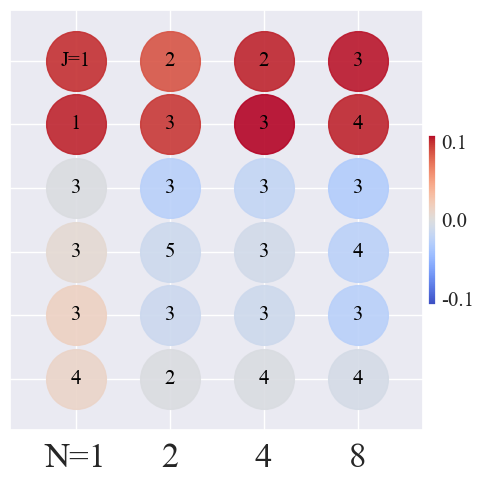

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
cmap = "coolwarm"
delta_r_free_arr = np.ndarray(shape=(4, 6))

## BUILD THE ARRAY STORING THE DIFF BETWEEN ORIG AND BEST R_FREE
for y in range(len(cif_names)):
    cif_name = cif_names[y]

    for x in range(len(Ns)):
        N = Ns[x]
        all_N_cif_rows = best_N_J_cif_df[(best_N_J_cif_df["N"] == N) & (best_N_J_cif_df["cif_name"] == cif_name)]
        best_row = all_N_cif_rows[all_N_cif_rows["r_free"] == all_N_cif_rows["r_free"].min()]

        best_r_free = best_row["r_free"].values[0]
        J = best_row["J"].values[0]

        delta = best_r_free - pdb_r_free_dict[cif_name]
        delta_r_free_arr[x, y] = delta

        print(cif_name, N, J, delta)

# NORMALIZE COLORBAR
delta_min, delta_max = delta_r_free_arr.min(), delta_r_free_arr.max()
delta_min = -delta_max
print(delta_min, delta_max)
norm = Normalize(vmin=delta_min, vmax=delta_max)

# PLOT
for x in range(len(Ns)):
    N = Ns[x]
    for y in range(len(cif_names)):
        cif_name = cif_names[y]
        delta = delta_r_free_arr[x, y]
        plt.scatter(x, y, s=1850, c=delta, cmap=cmap, norm=norm, alpha=0.9)

# ANNOTATIONS
for x in range(len(Ns)):
    N = Ns[x]
    for y in range(len(cif_names)):
        cif_name = cif_names[y]
        delta = delta_r_free_arr[x, y]

        all_N_cif_rows = best_N_J_cif_df[(best_N_J_cif_df["N"] == N) & (best_N_J_cif_df["cif_name"] == cif_name)]
        best_row = all_N_cif_rows[all_N_cif_rows["r_free"] == all_N_cif_rows["r_free"].min()]

        J = best_row["J"].values[0]

        if x == 0 and y == 5:
            plt.text(x, y, "J={}".format(J), ha="center", va="center", fontsize=15, color="black")
        else:
            plt.text(x, y, "{}".format(J), ha="center", va="center", fontsize=15, color="black")

# COLORBAR
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You have to set an array for the ScalarMappable
cbar = plt.colorbar(sm, ax=ax, label=None, fraction=.02, pad=.01)
cbar.ax.tick_params(labelsize=15, size=0)
new_ticks = [delta_min+.01, 0, delta_max-.01] # For 5 ticks
cbar.set_ticks(new_ticks)
cbar.set_ticklabels([f"{tick:.1f}" for tick in new_ticks])

## POINTS FOR PADDING
plt.scatter(-.5, -.5, s=0)
plt.scatter(3.5, 5.5, s=0, c="white")

## TICKS AND LABELS
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=5)

print("xlabels", [item.get_text() for item in ax.get_xticklabels()])
xlabels = ['', 'N=1', '2', '4', '8', '']
ax.set_xticklabels(xlabels)

# print("ylabels", [item.get_text() for item in ax.get_yticklabels()])
# ylabels = [''] + [cif_name.upper() for cif_name in cif_names] + ['']
# ax.set_yticklabels(ylabels)
ax.tick_params(left=False, labelleft=False)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

plt.xlabel(None)
plt.ylabel(None)

# monospace_font = FontProperties(family='Courier New', size=35)

# # Apply the monospaced font to y-axis tick labels
# for label in plt.gca().get_yticklabels():
#     label.set_fontproperties(monospace_font)

plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))



7mhk
7mhk 1 4
7mhk 2 2
7mhk 4 4
7mhk 8 4
7mhj
7mhj 1 3
7mhj 2 3
7mhj 4 3
7mhj 8 3
7mhi
7mhi 1 3
7mhi 2 5
7mhi 4 3
7mhi 8 4
7mhh
7mhh 1 3
7mhh 2 3
7mhh 4 3
7mhh 8 3
7mhg
7mhg 1 1
7mhg 2 3
7mhg 4 3
7mhg 8 4
7mhf
7mhf 1 1
7mhf 2 2
7mhf 4 2
7mhf 8 3


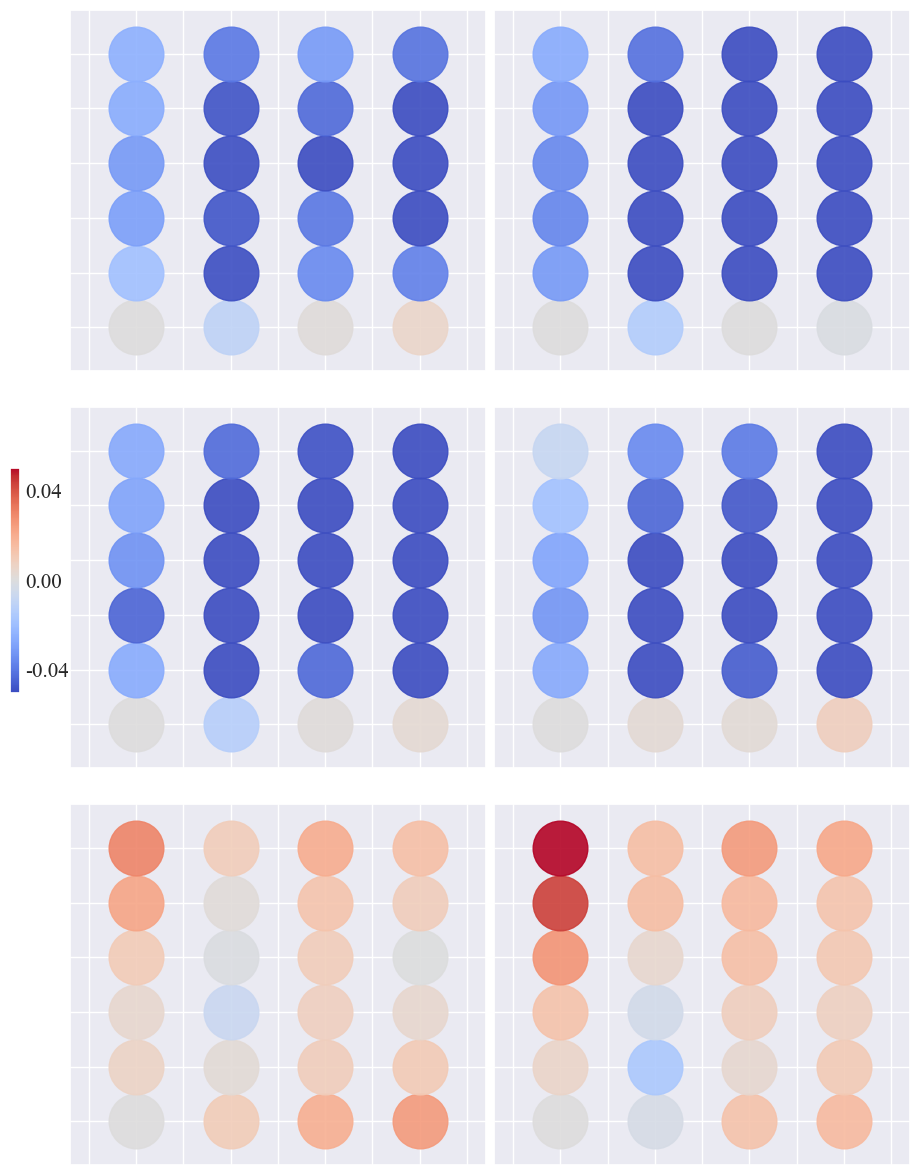

In [7]:
cmap = "coolwarm"

fig_adjust = 0.06

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.subplots_adjust(left=fig_adjust)  # Adjust subplots to make room for the colorbar

delta_r_free_arr = np.ndarray(shape=(6, 4, 6))
J_min_arr = np.ndarray(shape=(6, 4))

for i in range(len(cif_names)):
    cif_name = cif_names[i]
    print(cif_name)

    # Should it be relative to the N=1, J=1 R free or the pdb r free?
    N1_J1_r_free = summary_df[(summary_df["N"] == 1) & (summary_df["J"] == 1) & (summary_df["cif_name"] == cif_name)]["r_free"].values[0]

    for x in range(len(Ns)):
        deltas = list()

        N = Ns[x]
        for y in range(6):
            J = y+1

            best_r_free = summary_df[(summary_df["N"] == N) & (summary_df["J"] == J) & (summary_df["cif_name"] == cif_name)]["r_free"].values[0]
            delta = best_r_free - N1_J1_r_free
            delta_r_free_arr[i, x, y] = delta

            deltas.append(delta)

            # print(cif_name, N, J, delta)
        J_min = deltas.index(min(deltas))+1
        J_min_arr[i, x] = J_min
        print(cif_name, N, J_min)

# NORMALIZE COLORBAR
delta_min, delta_max = delta_r_free_arr.min(), delta_r_free_arr.max()
delta_min = -delta_max
# print(delta_min, delta_max)
norm = Normalize(vmin=-delta_max, vmax=delta_max)

for i in range(6):
    ax = axs[i//2][i%2]
    for x in range(len(Ns)):
        N = Ns[x]
        for y in range(len(cif_names)):
            J = y+1
            ax.scatter(x, J, s=1550, c=delta_r_free_arr[i, x, y], cmap=cmap, norm=norm, alpha=0.9)

    ax.scatter(-.5, .5, s=0)
    ax.scatter(3.5, 6.5, s=0)

    # if i == 0:
    #     ax.locator_params(axis='y', nbins=7)
    #     ylabels = [item.get_text() for item in ax.get_yticklabels()]
    #     ylabels = ['', '1', '2', '3', '4', '5', 'J=6', '']
    #     ax.set_yticklabels(ylabels)
    #     ax.tick_params(axis='y', labelsize=40)
    # else:
    ax.tick_params(left=False, labelleft=False)

    # if i == 4:
    #     ax.locator_params(axis='x', nbins=5)
    #     xlabels = [item.get_text() for item in ax.get_xticklabels()]
    #     xlabels = ['', 'N=1', '2', '4', '8', '']
    #     ax.set_xticklabels(xlabels)
    #     ax.tick_params(axis='x', labelsize=40)
    # else:
    ax.tick_params(bottom=False, labelbottom=False)

## COLORBAR
h, w = .15, .01
cbar_ax = fig.add_axes([0, (1-h)/2, w, h])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You have to set an array for the ScalarMappable
cbar = plt.colorbar(sm, cax=cbar_ax, label=None, fraction=.01, pad=0)
cbar.ax.tick_params(labelsize=15, size=0)
new_ticks = [-delta_max+.01, 0, delta_max-.01] # For 5 ticks
cbar.set_ticks(new_ticks)
cbar.set_ticklabels([f"{tick:.2f}" for tick in new_ticks])

#     plt.xlabel(None)
#     plt.ylabel(None)

plt.subplots_adjust(wspace=0.02, hspace=0.1)
# plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))



In [9]:
print(np.mean(J_min_arr[0:3]))
print(np.mean(J_min_arr[4:6]))

3.4166666666666665
2.375


In [6]:
best_rows = list()
deltas = list()
for i in range(6):
    cif_name = cif_names[i]
    for N in Ns:
        min_r_free = best_N_J_cif_df[(best_N_J_cif_df["cif_name"] == cif_name) & (best_N_J_cif_df["N"] == N)].min()["r_free"]
        best_row = best_N_J_cif_df[(best_N_J_cif_df["cif_name"] == cif_name) & (best_N_J_cif_df["N"] == N) & (best_N_J_cif_df["r_free"] == min_r_free)]
        best_rows.append(best_row)

        delta = min_r_free - pdb_r_free_dict[cif_name]
        deltas.append(delta)

        print(cif_name, N, min_r_free, delta, best_row["ff"].values[0], best_row["pdb"].values[0])

summary_table = pd.concat(best_rows)
summary_table["delta"] = deltas
summary_table.to_csv(Path(analysis_dir, "summary_ref_15.csv"))
summary_table.head()

7mhk 1 0.2621981910506567 0.015198191050656729 1532.9033582517495 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/12767.pdb
7mhk 2 0.2444189839082257 -0.002581016091774302 1493.468274358289 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/167_N2_ref_15/3314.pdb
7mhk 4 0.2431096010639035 -0.0038903989360964952 9940.660256784326 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/168_N4_ref_15/14334.pdb
7mhk 8 0.2382949594675319 -0.008705040532468095 7689.7554258883965 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/169_N8_ref_15/11582.pdb
7mhj 1 0.2594460916501707 0.019446091650170694 993.9664884256542 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/166_N1_ref_15/9108.pdb
7mhj 2 0.2228117746606524 -0.01718822533934758 2370.670843257498 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/167_N2_ref_15/8601.pdb
7mhj 4 0.2251661383917559 -0.014833861608244098 5154.327233521403 /wynton/group/sali/mhancock/xray/sample_bench/out/7mhf/168_N4_ref_1

,index,job_id,cif_name,w_0,pdb,r_free,ff,N,J,w_1,w_2,w_3,w_4,w_5,w_6,w_7,delta
12765,12767,48,7mhk,1.000000,/wynton/group/sali/mhancock/xray/sample_bench/...,0.262198,1532.903358,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015198
22512,3314,19,7mhk,0.507065,/wynton/group/sali/mhancock/xray/sample_bench/...,0.244419,1493.468274,2,2,0.492935,NaN,NaN,NaN,NaN,NaN,NaN,-0.002581
52732,14334,52,7mhk,0.314457,/wynton/group/sali/mhancock/xray/sample_bench/...,0.243110,9940.660257,4,4,0.291355,0.299415,0.094774,NaN,NaN,NaN,NaN,-0.003890
69180,11582,45,7mhk,0.163293,/wynton/group/sali/mhancock/xray/sample_bench/...,0.238295,7689.755426,8,4,0.107244,0.175128,0.052274,0.260207,0.13181,0.026596,0.083449,-0.008705
9106,9108,39,7mhj,1.000000,/wynton/group/sali/mhancock/xray/sample_bench/...,0.259446,993.966488,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019446


In [6]:
def get_rgb(x, y):
    # Calculate the difference between x and y
    diff = x - y
    if y < x:
        scale = abs(diff) * 1000
        return 128, 180+scale, 128
    else:
        scale = abs(diff) * 1000
        return 128+scale, 128, 128

    return (red, green, 0)  # Return the RGB color


def rgb_to_hex(rgb):
    r, g, b = rgb
    # Ensure RGB values are within the valid range
    r = int(max(0, min(255, r)))
    g = int(max(0, min(255, g)))
    b = int(max(0, min(255, b)))

    # Convert to hexadecimal
    hex_color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return hex_color